## Linear Regression 

We have the predictor (independent) variable $x$, the target (dependent) variable $y$, the bias $b$ and the slope parameter $w$. Given that, we formulate the equation:

$$ y = b + wx $$

Thus, we can create a forward in a linear regression to the equation:

$$ \hat{y} = 1 - 3x $$

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch

x = torch.linspace(-3, 3, 15)
x

tensor([-3.0000, -2.5714, -2.1429, -1.7143, -1.2857, -0.8571, -0.4286,  0.0000,
         0.4286,  0.8571,  1.2857,  1.7143,  2.1429,  2.5714,  3.0000])

In [4]:
y_ = 1 - 3*x
y_

tensor([10.0000,  8.7143,  7.4286,  6.1429,  4.8571,  3.5714,  2.2857,  1.0000,
        -0.2857, -1.5714, -2.8571, -4.1429, -5.4286, -6.7143, -8.0000])

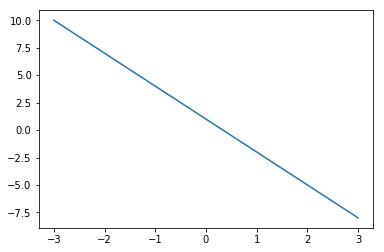

In [9]:
plt.plot(x.numpy(), y_.numpy())
plt.show()

## Linear Regression Forward

Instead of knowing the equation, we have to discover it from a bunch of data points. Thus, we perform the forward and store the gradient to update our weights.

In [11]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

def forward(x):
    y = w*x+b
    return y

# testing
x = torch.tensor([[1.0]])
y_ = forward(x)
print(y_)

tensor([[1.]], grad_fn=<ThAddBackward>)


In [12]:
# using multiple samples
x = torch.tensor([[1.0], [2.0]])
y_ = forward(x)
print(y_)

tensor([[1.],
        [3.]], grad_fn=<ThAddBackward>)


In practice, what it is doing is to calculate the equation $\hat{y} = b + wx$ for every sample. Thus, 

$x = 
\begin{bmatrix}
1.0\\ 
2.0
\end{bmatrix}
$<br>
$\hat{y} = -1 + 2x$<br>
$\hat{y} = 
\begin{bmatrix}
-1\\ 
-1
\end{bmatrix}+ 2
\begin{bmatrix}
1.0\\ 
2.0
\end{bmatrix} \ \ \ \ = \ \ \ \ 
\begin{bmatrix}
-1\\ 
-1
\end{bmatrix}+
\begin{bmatrix}
2(1.0)\\ 
2(2.0)
\end{bmatrix} \ \ \ \ = \ \ \ \
\begin{bmatrix}
-1 + 2\\ 
-1 + 4
\end{bmatrix} \ \ \ \ = \ \ \ \
\begin{bmatrix}
1\\ 
3
\end{bmatrix}
$<br>

# Pytorch Class Linear

In [30]:
from torch.nn import Linear

torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [31]:
#testing the model
x = torch.tensor([[0.0]])
y_ = model(x)
print y_

tensor([[-0.4414]], grad_fn=<ThAddmmBackward>)


In [32]:
# testing with multiple inputs
x = torch.tensor([[1.0], [2.0]])
y_ = model(x)
print y_

tensor([[0.0739],
        [0.5891]], grad_fn=<ThAddmmBackward>)


# Custom Modules

In [36]:
import torch.nn as nn

torch.manual_seed(1)
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        #super(LR, self).__init__()
        nn.Module.__init__(self)
        self.linear = nn.Linear(in_size, out_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [37]:
# initializing the custom model
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [38]:
#testing the custom model
x = torch.tensor([[0.0]])
y_ = model(x)
print y_

tensor([[-0.4414]], grad_fn=<ThAddmmBackward>)


In [39]:
# testing with multiple inputs
x = torch.tensor([[1.0], [2.0]])
y_ = model(x)
print y_

tensor([[0.0739],
        [0.5891]], grad_fn=<ThAddmmBackward>)
